# Session 2 - Multi-Armed Bandits - Assignment

In this assignment you will apply different multi-armed bandit algorithms in order to discover the bandit with highest reward.
We'll start with deterministic bandits, meaning that the bandit rewards are not subject to any underlying stochastic process.
Next we'll focuss on stochastic bandits where the reward of a bandit is the result of a stochastic process and therefore making the discovery of the best bandit much harder. 
Finally we will applay the MAB strategies to solve practical real-life problems.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Deterministic bandits
Assume you have to play 5 bandits with fixed rewards. These rewards are hidden and unknown when you start playing. 
You can play the bandits 100 times. Find out how you can maximize your total reward over these 100 trials.

Use the BanditEnv_1 environment for this experiment.

In [2]:
##### Deterministic Bandit Environment

class BanditEnv_1:
    def __init__(self):
        self.rewards = [-10,6,8,0,-2]
        
    def reset(self):
        self.rewards = [-10,6,8,0,-2]
        
    def step(self,action):
        self.action = action
        return self.rewards[self.action]

In [3]:
# Create an Env1 object
Env1 = BanditEnv_1()
Env1.reset()

In [4]:
# Taken an action. For example choose bandit 0
reward = Env1.step(0)
print('reward =', reward)

reward = -10


If you know in advance that the bandits have fixed rewards, the best strategy will be to play them all once and then pick the one with the highest reward (greedy action).

[-10, 6, 8, 0, -2]
Bandit with the highest reward is bandit 2 with a reward of 8
The total reward =  710


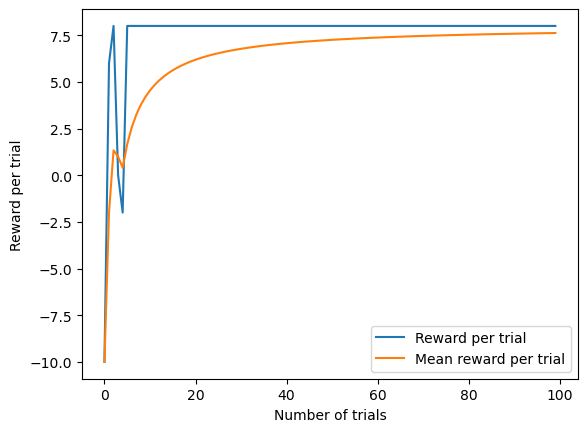

In [5]:
rewards = []
meanRewards = []
totalReward = 0
for action in range(5):
    rewards.append(Env1.step(action))
    meanRewards.append(np.mean(rewards))
    totalReward = totalReward + reward
    
print(rewards)
bestAction = np.argmax(rewards)
print('Bandit with the highest reward is bandit',bestAction, 'with a reward of',rewards[bestAction])

for i in range(100 - 5):
    rewards.append(Env1.step(bestAction))
    meanRewards.append(np.mean(rewards))
    totalReward = totalReward + Env1.step(bestAction)

print('The total reward = ', totalReward)

# Plot the rewards as a funtion of the number of trials
plt.plot(rewards)
plt.plot(meanRewards)
plt.xlabel('Number of trials')
plt.ylabel('Reward per trial')
plt.legend(['Reward per trial','Mean reward per trial'])

##### 2. Stochastic bandits

In the case of stochastic bandits, the reward is sampled from an initially unknown distribution. Our task is to discover the expected reward of each of the bandits as quickly (and reliably) as possible. 
As an example, assume that the reward of a bandit comes from a normal distribution with mean = 10 and standard deviation of 5. This means that in 68% procent of the trials this bandit will return a reward between 10-5 = 5 and 10+5 = 15. If you play this bandit multiple times, you can expect that the average reward will converge to 10.

Use BanditEnv_2 for this exercise. All 5 bandits have rewards coming from normal distributions with different means, but with the same standard deviation (std = 1).
You can play this bandit 200 times. Try to come up with a good strategy to maximize the total reward over these 200 trials.

In [6]:
class BanditEnv_2:
    def __init__(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1
        
    def reset(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1

    def step(self,action):
        self.action = action
        return np.random.normal(self.means[self.action], self.std, 1)[0]

In [7]:
# Create an Env2 object
Env2 = BanditEnv_2()
Env2.reset()
print(Env2.means)

[-10, 6, 8, 0, -2]


### 2.1 Epsilon Greedy

1. Implement the epsilon greedy algorithm to play the Env2 bandits. 
2. Show the influence of epsilon parameter. Do this by plotting the reward history for different values of epsilon. Also visualize how often a bandit was chosen.
3. Find the optimal epsilon value giving you maximum total reward.
4. Use epsilon decay. This means that you gradually decrease the value of epsilon as the number of trials increases. Use the following rule: $\epsilon(t+1) = \eta \times \epsilon(t) $ where $0< \eta < 1$
5. Now test for different values of the standard deviation. What if the standard deviation becomes larger?

epsilon =  0.0 total reward =  758.6825659272556
epsilon =  0.1 total reward =  673.9279631812233
epsilon =  0.2 total reward =  618.2485350656358
epsilon =  0.3 total reward =  513.33373780736
epsilon =  0.4 total reward =  418.11767142441823
epsilon =  0.5 total reward =  411.94159430673346
epsilon =  0.6 total reward =  320.73826930213727
epsilon =  0.7 total reward =  298.7229774158083
epsilon =  0.8 total reward =  139.88463305489051
epsilon =  0.9 total reward =  117.8030904973452
epsilon =  1.0 total reward =  55.08539817611507


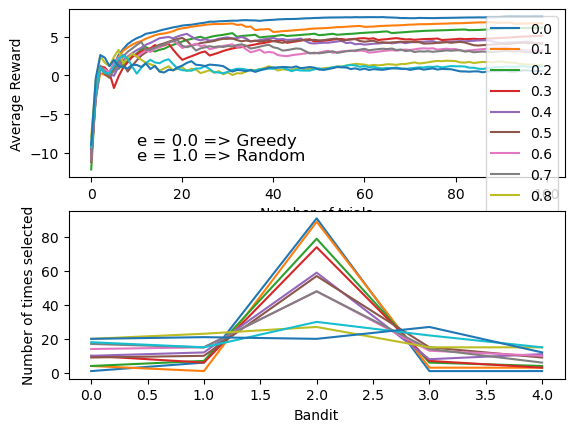

<Figure size 2000x1000 with 0 Axes>

In [12]:
# epsilon greedy
iterations = 100
epsilon = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Banditcount = len(Env2.means)


for e in epsilon:
    Bandits = np.zeros(Banditcount)
    means = np.zeros(Banditcount)
    rewards = []
    meanRewards = []
    totalReward = 0

    # Play the first 5 actions to set the initial estimated means
    for action in range(Banditcount):
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        means[action] = reward
        Bandits[action] = Bandits[action] + 1
        totalReward = totalReward + reward

    for _ in range(iterations-Banditcount):
        if np.random.random() < e:
            action = np.random.randint(Banditcount)
        else:
            action = np.argmax(means)
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = reward
        totalReward = totalReward + reward
    print('epsilon = ', e, 'total reward = ', totalReward)
    
    ax1 = plt.subplot(2,1,1)
    plt.plot(meanRewards)
    ax2 = plt.subplot(2,1,2)
    plt.plot(Bandits)
plt.figure(figsize=(20,10))
ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(epsilon)
ax1.text(10, -9, 'e = 0.0 => Greedy', fontsize=12)
ax1.text(10, -11, 'e = 1.0 => Random', fontsize=12)
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Number of times selected')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Epsilon =  1.0
Epsilon =  0.9
Epsilon =  0.81
Epsilon =  0.7290000000000001
Epsilon =  0.6561000000000001
Epsilon =  0.5904900000000002
Epsilon =  0.5314410000000002
Epsilon =  0.47829690000000014
Epsilon =  0.43046721000000016
Epsilon =  0.38742048900000015
Epsilon =  0.34867844010000015
Epsilon =  0.31381059609000017
Epsilon =  0.28242953648100017
Epsilon =  0.25418658283290013
Epsilon =  0.22876792454961012
Epsilon =  0.2058911320946491
Epsilon =  0.1853020188851842
Epsilon =  0.16677181699666577
Epsilon =  0.1500946352969992
Epsilon =  0.13508517176729928
Epsilon =  0.12157665459056936
Epsilon =  0.10941898913151243
Epsilon =  0.0984770902183612
Epsilon =  0.08862938119652508
Epsilon =  0.07976644307687257
Epsilon =  0.07178979876918531
Epsilon =  0.06461081889226679
Epsilon =  0.05814973700304011
Epsilon =  0.0523347633027361
Epsilon =  0.04710128697246249
Epsilon =  0.042391158275216244
Epsilon =  0.03815204244769462
Epsilon =  0.03433683820292516
Epsilon =  0.030903154382632643


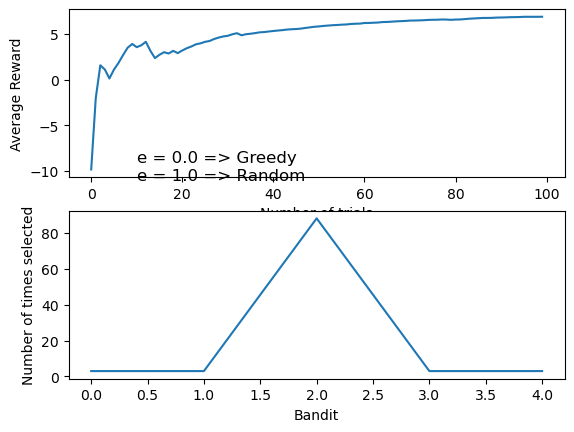

<Figure size 2000x1000 with 0 Axes>

In [19]:
# Epsilon decay
iterations = 100
e = 1.0
decay = 0.9
Banditcount = len(Env2.means)


Bandits = np.zeros(Banditcount)
means = np.zeros(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

# Play the first 5 actions to set the initial estimated means
for action in range(Banditcount):
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    means[action] = reward
    Bandits[action] = Bandits[action] + 1
    totalReward = totalReward + reward

for _ in range(iterations-Banditcount):
    if np.random.random() < e:
        action = np.random.randint(Banditcount)
    else:
        action = np.argmax(means)
    print('Epsilon = ', e)
    e = e * decay
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    means[action] = reward
    totalReward = totalReward + reward
print('epsilon = ', e, 'total reward = ', totalReward)

ax1 = plt.subplot(2,1,1)
plt.plot(meanRewards)
ax2 = plt.subplot(2,1,2)
plt.plot(Bandits)
plt.figure(figsize=(20,10))
ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.text(10, -9, 'e = 0.0 => Greedy', fontsize=12)
ax1.text(10, -11, 'e = 1.0 => Random', fontsize=12)
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Number of times selected')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### 2.2 Optimistic Initial Value

Continue to work with the Env2 environment. 
Implement the Optimistic Initial Value algorithm. Start by initializing the estimated bandit means to a high non-zero value and use a greedy approach. 
After each play the estimated bandit mean will come closer to the true bandit mean.

1. Implement the optimistic initial value algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Show the initialization. What happens if you initialize the estimated means to larger values? 
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the optimistic initial value approach to the epsilon greedy approach. Plot the reward history of both in one graph.



In [ ]:
class BanditEnv_2:
    def __init__(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1
        
    def reset(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1

    def step(self,action,stdev=None):
        self.action = action
        if stdev is None:
            return np.random.normal(self.means[self.action], self.std, 1)[0]
        return np.random.normal(self.means[self.action], stdev, 1)[0]

In [ ]:
# Create an Env2 object
Env2 = BanditEnv_2()
Env2.reset()
print(Env2.means)

[-10, 6, 8, 0, -2]


True means =  [-10, 6, 8, 0, -2]
Optimistic Initail Values =  [1000, 1000, 1000, 1000, 1000]
---------------------------------------------------------------
Standard deviation =  0.1
total reward =  4960.681260628084
Bandits =  [ 51. 254. 514. 101.  85.]
Estimated means =  [9.81960191763681, 9.926231013252066, 9.930537030412268, 9.92135664464462, 9.791362714371406]
Errors =  [19.81960192  3.92623101  1.93053703  9.92135664 11.79136271]
Total Absolute Error =  47.38908932031717
Mean Absolute Error =  9.477817864063434
Mean Squared Error =  129.88568714018203
Root Mean Squared Error =  11.396740197976877
---------------------------------------------------------------
Standard deviation =  1
total reward =  4929.773405014313
Bandits =  [ 51. 256. 514.  99.  85.]
Estimated means =  [9.863128373887104, 9.889266191298573, 9.894936878914118, 9.896588254133928, 9.75696376532376]
Errors =  [19.86312837  3.88926619  1.89493688  9.89658825 11.75696377]
Total Absolute Error =  47.30088346355748
Me

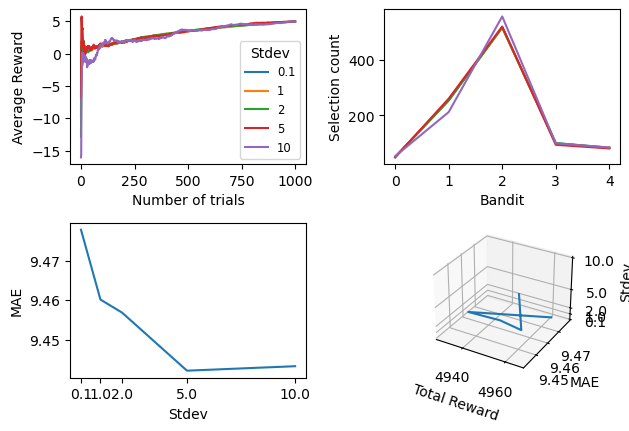

In [ ]:
# Optimistic initial value
# Hidden means are [-10,6,8,0,-2]
iterations = 1000
OptimisticInitialValue = 1000
stdevs = [0.1, 1, 2, 5, 10]
Banditcount = len(Env2.means)
means = [OptimisticInitialValue for i in range(Banditcount)]
total_errors = []
totalRewards = []

fig = plt.figure()

print('True means = ', Env2.means)
print('Optimistic Initail Values = ', means)
print('---------------------------------------------------------------')
for stdev in stdevs:
    Bandits = np.ones(Banditcount)
    means = [OptimisticInitialValue for i in range(Banditcount)]
    rewards = []
    meanRewards = []
    totalReward = 0
    print('Standard deviation = ', stdev)

    for _ in range(iterations):
        action = np.argmax(means)
        reward = Env2.step(action,stdev)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = means[action] + ((reward - means[action]) / Bandits[action])
        totalReward = totalReward + reward
    totalRewards.append(totalReward)
    print('total reward = ', totalReward)
    print('Bandits = ', Bandits)
    print('Estimated means = ', means)
    error = np.abs(np.array(Env2.means) - np.array(means))
    total_error = np.sum(error)
    total_errors.append(total_error / len(error))
    print('Errors = ', error)
    print('Total Absolute Error = ', total_error)
    print('Mean Absolute Error = ', total_error / len(error))
    print('Mean Squared Error = ', np.sum(error**2) / len(error))
    print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
    print('---------------------------------------------------------------')

    ax1 = plt.subplot(2,2,1)
    plt.plot(meanRewards, label=stdev)
    ax2 = plt.subplot(2,2,2)
    plt.plot(Bandits)
ax3 = fig.add_subplot(2,2,3)
ax3.set_xticks(stdevs)
# ax3.set_xticklabels(stdevs)
plt.plot(stdevs,total_errors)

ax4 = fig.add_subplot(2,2,4, projection='3d')
plt.plot(totalRewards,total_errors,stdevs)

ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(stdevs, title='Stdev', loc='lower right', fontsize='small')
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Selection count')

ax3.set_xlabel('Stdev')
ax3.set_ylabel('MAE')

ax4.set_xlabel('Total Reward')
ax4.set_ylabel('MAE')
ax4.set_zticks(stdevs)
ax4.set_zlabel('Stdev')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




True means =  [-10, 6, 8, 0, -2]
---------------------------------------------------------------
Optimistic Initail Values =  [10, 10, 10, 10, 10]
total reward =  8004.150001586908
Bandits =  [  2.   3. 996.   2.   2.]
Estimated means =  [-0.41805757492557305, 6.963898381587302, 8.048314808035189, 4.407239986108915, 4.579196408366052]
Errors =  [9.58194243 0.96389838 0.04831481 4.40723999 6.57919641]
Total Absolute Error =  21.580592009171884
Mean Absolute Error =  4.316118401834377
Mean Squared Error =  31.090928944631468
Root Mean Squared Error =  5.575924044015617
---------------------------------------------------------------
Optimistic Initail Values =  [50, 50, 50, 50, 50]
total reward =  7814.746826847987
Bandits =  [  4.  25. 963.   7.   6.]
Estimated means =  [5.231741453246212, 7.963689135908551, 8.048030409536523, 7.627335292119232, 6.847166868129235]
Errors =  [15.23174145  1.96368914  0.04803041  7.62733529  8.84716687]
Total Absolute Error =  33.71796315893975
Mean Absolu

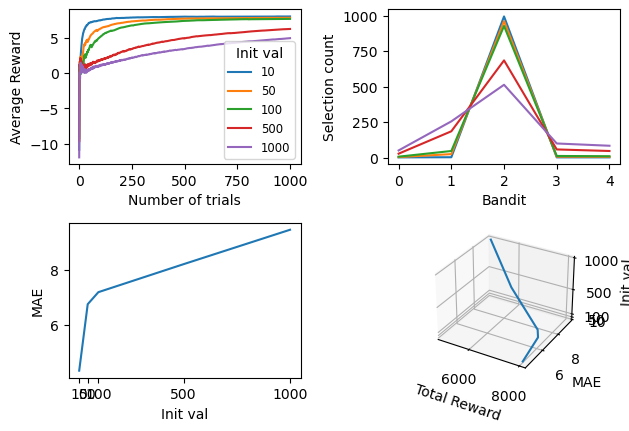

In [ ]:
# Optimistic initial value
# Hidden means are [-10,6,8,0,-2]
iterations = 1000
OptimisticInitialValues = [10, 50, 100, 500, 1000]
stdevs = [0.1, 1, 2, 5, 10]
Banditcount = len(Env2.means)
total_errors = []
totalRewards = []

fig = plt.figure()

print('True means = ', Env2.means)

print('---------------------------------------------------------------')
for OptimisticInitialValue in OptimisticInitialValues:
    Bandits = np.ones(Banditcount)
    means = [OptimisticInitialValue for i in range(Banditcount)]
    rewards = []
    meanRewards = []
    totalReward = 0
    print('Optimistic Initail Values = ', means)

    for _ in range(iterations):
        action = np.argmax(means)
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = means[action] + ((reward - means[action]) / Bandits[action])
        totalReward = totalReward + reward
    totalRewards.append(totalReward)
    print('total reward = ', totalReward)
    print('Bandits = ', Bandits)
    print('Estimated means = ', means)
    error = np.abs(np.array(Env2.means) - np.array(means))
    total_error = np.sum(error)
    total_errors.append(total_error / len(error))
    print('Errors = ', error)
    print('Total Absolute Error = ', total_error)
    print('Mean Absolute Error = ', total_error / len(error))
    print('Mean Squared Error = ', np.sum(error**2) / len(error))
    print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
    print('---------------------------------------------------------------')

    ax1 = plt.subplot(2,2,1)
    plt.plot(meanRewards, label=OptimisticInitialValue)
    ax2 = plt.subplot(2,2,2)
    plt.plot(Bandits)
ax3 = fig.add_subplot(2,2,3)
ax3.set_xticks(OptimisticInitialValues)
plt.plot(OptimisticInitialValues,total_errors)

ax4 = fig.add_subplot(2,2,4, projection='3d')
plt.plot(totalRewards,total_errors,OptimisticInitialValues)

ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(OptimisticInitialValues, title='Init val', loc='lower right', fontsize='small')
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Selection count')

ax3.set_xlabel('Init val')
ax3.set_ylabel('MAE')

ax4.set_xlabel('Total Reward')
ax4.set_ylabel('MAE')
ax4.set_zticks(OptimisticInitialValues)
ax4.set_zlabel('Init val')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




Epsilon Greedy
Epsilon =  0.1 total reward =  7375.438945277043
---------------------------------------------------------------
Optimistic Initial Value
True means =  [-10, 6, 8, 0, -2]
Optimistic Initail Values =  [50, 50, 50, 50, 50]
total reward =  7825.646442374274
Bandits played =  [  4.  25. 963.   7.   6.]
Estimated means =  [5.466313051188802, 7.995047470041191, 8.06041937670508, 7.473674289480744, 6.567570604188152]
Errors =  [15.46631305  1.99504747  0.06041938  7.47367429  8.5675706 ]
Total Absolute Error =  33.563024791603965
Mean Absolute Error =  6.712604958320793
Mean Squared Error =  74.48995554983335
Root Mean Squared Error =  8.630756371827058
---------------------------------------------------------------


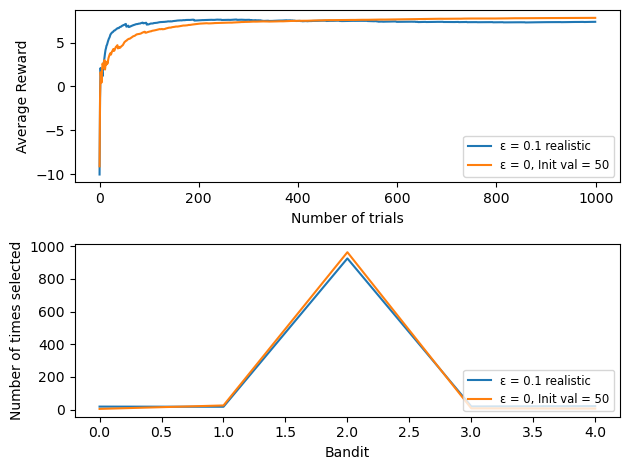

In [ ]:
# epsilon greedy vs optimistic initial value
# epsilon greedy
print('Epsilon Greedy')
iterations = 1000
epsilon = 0.1
Banditcount = len(Env2.means)

Bandits = np.zeros(Banditcount)
means = np.zeros(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

# Play the first 5 actions to set the initial estimated means
for action in range(Banditcount):
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    means[action] = reward
    Bandits[action] = Bandits[action] + 1
    totalReward = totalReward + reward
# Play the rest of the actions
for _ in range(iterations-Banditcount):
    if np.random.random() < epsilon:
        action = np.random.randint(Banditcount)
    else:
        action = np.argmax(means)
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    means[action] = means[action] + ((reward - means[action]) / Bandits[action])
    totalReward = totalReward + reward
print('Epsilon = ', epsilon, 'total reward = ', totalReward)
ax1 = plt.subplot(2,1,1)
plt.plot(meanRewards)
ax2 = plt.subplot(2,1,2)
plt.plot(Bandits)
print('---------------------------------------------------------------')

# Optimistic initial value
# Hidden means are [-10,6,8,0,-2]
print('Optimistic Initial Value')
OptimisticInitialValue = 50
means = [OptimisticInitialValue for i in range(Banditcount)]
Bandits = np.ones(Banditcount)
rewards = []
meanRewards = []
totalReward = 0

print('True means = ', Env2.means)
print('Optimistic Initail Values = ', means)

for _ in range(iterations):
    action = np.argmax(means)
    reward = Env2.step(action)
    rewards.append(reward)
    meanRewards.append(np.mean(rewards))
    Bandits[action] = Bandits[action] + 1
    means[action] = means[action] + ((reward - means[action]) / Bandits[action])
    totalReward = totalReward + reward

print('total reward = ', totalReward)
print('Bandits played = ', Bandits)
print('Estimated means = ', means)
error = np.abs(np.array(Env2.means) - np.array(means))
total_error = np.sum(error)

print('Errors = ', error)
print('Total Absolute Error = ', total_error)
print('Mean Absolute Error = ', total_error / len(error))
print('Mean Squared Error = ', np.sum(error**2) / len(error))
print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
print('---------------------------------------------------------------')

ax1 = plt.subplot(2,1,1)
plt.plot(meanRewards)
ax2 = plt.subplot(2,1,2)
plt.plot(Bandits)
# Plot modifications
ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(['\u03B5 = 0.1 realistic','\u03B5 = 0, Init val = 50'], loc='lower right', fontsize='small')
ax2.set_xlabel('Bandit')
ax2.set_ylabel('Number of times selected')
ax2.legend(['\u03B5 = 0.1 realistic','\u03B5 = 0, Init val = 50'], loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()

### 2.3 Upper Confidence Bound

Continue to work with the Env2 environment and implement the Upper Confidence Bound algorithm. 
Select the action based on the following rule:

$A_t = argmax_a \left( MeanRewards + c  \sqrt{\frac{\ln{t}}{N_a(t)}}  \right)$

1. Implement the upper confidence bound algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Change the parameter c? Explain the influence of c. 
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the upper confidence bound approach to the epsilon greedy approach and opimistic initial value. Plot the reward histories of the algorithms in one graph.


True means =  [-10, 6, 8, 0, -2]
---------------------------------------------------------------
Confidence =  0.1
total reward =  7999.031444252044
Bandits =  [  2.   3. 996.   2.   2.]
Estimated means =  [-10.624075405084238, 7.257214573377359, 8.038592171765856, 0.49581843721552116, -2.8112803305865066]
Errors =  [0.62407541 1.25721457 0.03859217 0.49581844 0.81128033]
Total Absolute Error =  3.2269809180294806
Mean Absolute Error =  0.6453961836058961
Mean Squared Error =  0.5751119295888938
Root Mean Squared Error =  0.7583613449991329
---------------------------------------------------------------
Confidence =  0.2
total reward =  7985.996091240017
Bandits =  [  2.   2. 997.   2.   2.]
Estimated means =  [-10.562487095074328, 5.286521094360232, 8.02580450008244, 1.3872481898614237, -2.2423638228078535]
Errors =  [0.5624871  0.71347891 0.0258045  1.38724819 0.24236382]
Total Absolute Error =  2.9313825134658136
Mean Absolute Error =  0.5862765026931627
Mean Squared Error =  0.5618

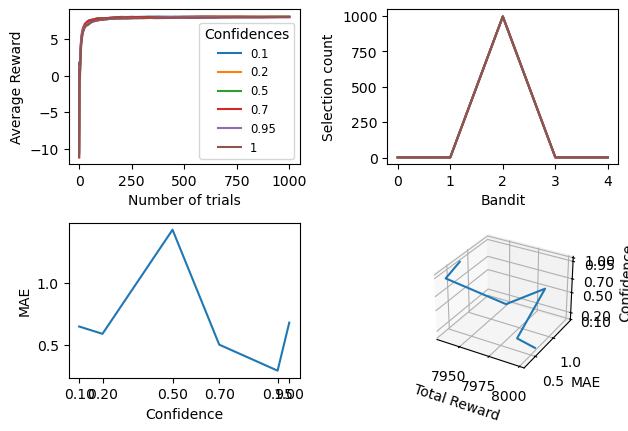

In [27]:
# Upper Confidence Bound
# Hidden means are [-10,6,8,0,-2]
iterations = 1000
stdevs = 1
confidences = [0.1, 0.2, 0.5, 0.7, 0.95, 1]
Banditcount = len(Env2.means)
bounds = [0 for i in range(Banditcount)]
total_errors = []
totalRewards = []

fig = plt.figure()

print('True means = ', Env2.means)

print('---------------------------------------------------------------')
for c in confidences:
    print('Confidence = ', c)
    Bandits = np.ones(Banditcount)
    means = [0 for i in range(Banditcount)]
    rewards = []
    meanRewards = []
    totalReward = 0
    
    # Play the first 5 actions to set the initial estimated means otherwise we will divide by zero (bandit count)
    for action in range(Banditcount):
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        means[action] = reward
        Bandits[action] = Bandits[action] + 1
        totalReward = totalReward + reward

    for _ in range(iterations-Banditcount):
        action = np.argmax(means+c*np.sqrt(np.log(np.sum(Bandits))/Bandits))
        reward = Env2.step(action)
        rewards.append(reward)
        meanRewards.append(np.mean(rewards))
        Bandits[action] = Bandits[action] + 1
        means[action] = means[action] + ((reward - means[action]) / Bandits[action])
        totalReward = totalReward + reward
    totalRewards.append(totalReward)
    print('total reward = ', totalReward)
    print('Bandits = ', Bandits)
    print('Estimated means = ', means)
    error = np.abs(np.array(Env2.means) - np.array(means))
    total_error = np.sum(error)
    total_errors.append(total_error / len(error))
    print('Errors = ', error)
    print('Total Absolute Error = ', total_error)
    print('Mean Absolute Error = ', total_error / len(error))
    print('Mean Squared Error = ', np.sum(error**2) / len(error))
    print('Root Mean Squared Error = ', np.sqrt(np.sum(error**2) / len(error)))
    print('---------------------------------------------------------------')

    ax1 = plt.subplot(2,2,1)
    plt.plot(meanRewards, label=c)
    ax2 = plt.subplot(2,2,2)
    plt.plot(Bandits)
ax3 = fig.add_subplot(2,2,3)
ax3.set_xticks(confidences)
plt.plot(confidences,total_errors)

ax4 = fig.add_subplot(2,2,4, projection='3d')
plt.plot(totalRewards,total_errors,confidences)

ax1.set_xlabel('Number of trials')
ax1.set_ylabel('Average Reward')
ax1.legend(confidences, title='Confidences', loc='lower right', fontsize='small')

ax2.set_xlabel('Bandit')
ax2.set_ylabel('Selection count')

ax3.set_xlabel('Confidence')
ax3.set_ylabel('MAE')

ax4.set_xlabel('Total Reward')
ax4.set_ylabel('MAE')
ax4.set_zticks(confidences)
ax4.set_zlabel('Confidence')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### EXTRA: non-stationary bandits

In the following you have to deal with non-stationary bandits. This means that the expected reward is not stationary and will change over time. 
in the BanditEnv_3, the initial expected rewards will change with a constant after each action.

Figure out the best strategy to optimize the total reward after 200 actions.

In [ ]:
class BanditEnv_3:
    def __init__(self):
        self.means = np.array([[-10,6,8,0,-2]])
        self.std = 1
    def reset(self):
        self.means = np.array([[-10,6,8,0,-2]])
        
    def step(self,action):
        self.action = action
        self.means = self.means + np.array([[0.15,-0.1,-0.15,0.05,0.1]])
        return np.random.normal(self.means[0,self.action], self.std, 1)[0]

In [ ]:
# create an env3 environment
env3 = BanditEnv_3()
env3.reset()

# solve the environment (for 200 steps)


## 3. Server latencies

You have to make 1000 webpage requests. There are 25 servers with different latencies to choose from. 
Your task is to come up with a clever strategy to reduce the cumulative latency of these 1000 webpage requests.
The file 'latencies.csv' contains these 1000 different request. 
It's important to know that in a practical situation you would not have access to this data and requests will be made sequentially.
Use a multi-armed bandit to find the best strategy to minimize the total latency over these 1000 requests. Again, it's not allowed to process and statistically analyse the data in advance.

1. Try and optimize different types of bandits: epsilon-greedy, optimistic initial value, upper confidence bound. 
2. Compare these bandits in terms of total cumulated reward (or regret). Make a graph to visualize this.
3. Make graphs showing how often each bandit was chosen.


EXTRA: program a bayesian badit to solve the latency problem.

In [ ]:
dataset = pd.read_csv('latencies.csv')
dataset.tail()

,Server_1,Server_2,Server_3,Server_4,Server_5,Server_6,Server_7,Server_8,Server_9,Server_10,...,Server_16,Server_17,Server_18,Server_19,Server_20,Server_21,Server_22,Server_23,Server_24,Server_25
995,265,1080,136,25,395,1350,105,113,85,471,...,414,129,410,176,589,92,56,1298,234,2603
996,473,6306,84,121,392,33,103,97,876,883,...,451,129,412,245,1113,132,62,11429,305,2264
997,269,1064,83,25,399,33,104,99,615,639,...,417,132,561,143,652,101,56,953,232,2293
998,270,1071,84,24,393,33,120,118,298,755,...,415,129,327,871,670,109,60,954,232,2251
999,296,1065,84,25,395,34,104,111,83,751,...,413,130,305,122,763,102,74,1640,352,2530


In [ ]:
# Server latencies

